1. Імпортуйте необхідні модулі (matplotlib та інші).

In [79]:
import heapq
import matplotlib.pyplot as plt

2. Візьміть код реалізації MapReduce з конспекту.

In [80]:
import string

from concurrent.futures import ThreadPoolExecutor
from collections import defaultdict

import requests


def get_text(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Перевірка на помилки HTTP
        return response.text
    except requests.RequestException as e:
        return None


# Функція для видалення знаків пунктуації
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


def map_function(word):
    return word, 1


def shuffle_function(mapped_values):
    shuffled = defaultdict(list)
    for key, value in mapped_values:
        shuffled[key].append(value)
    return shuffled.items()


def reduce_function(key_values):
    key, values = key_values
    return key, sum(values)


# Виконання MapReduce
def map_reduce(text, search_words=None):
    # Видалення знаків пунктуації
    text = remove_punctuation(text)
    words = text.split()

    # Якщо задано список слів для пошуку, враховувати тільки ці слова
    if search_words:
        words = [word for word in words if word in search_words]

    # Паралельний Мапінг
    with ThreadPoolExecutor() as executor:
        mapped_values = list(executor.map(map_function, words))

    # Крок 2: Shuffle
    shuffled_values = shuffle_function(mapped_values)

    # Паралельна Редукція
    with ThreadPoolExecutor() as executor:
        reduced_values = list(executor.map(reduce_function, shuffled_values))

    return dict(reduced_values)

3. Створіть функцію visualize_top_words для візуалізації результатів.

In [81]:
def visualize_top_words(url, n):
    text = get_text(url)
    if text:
        # Виконання MapReduce на вхідному тексті
        result = map_reduce(text)
        # print("Результат підрахунку слів:", result)
        heap = [(value, key) for key, value in result.items()]
        lagest = heapq.nlargest(n, heap, key=None)
        lagest.reverse()

        y = [i[1] for i in lagest]
        x = [i[0] for i in lagest]
        plt.barh(y, x)

        # setting label of y-axis
        plt.ylabel("Words")

        # setting label of x-axis
        plt.xlabel("Frequency")
        plt.title(f"Top {n} Most Frequent Words")
        plt.show()

    else:
        print("Помилка: Не вдалося отримати вхідний текст.")

4. У головному блоці коду отримайте текст за URL, застосуйте MapReduce та візуалізуйте результати.

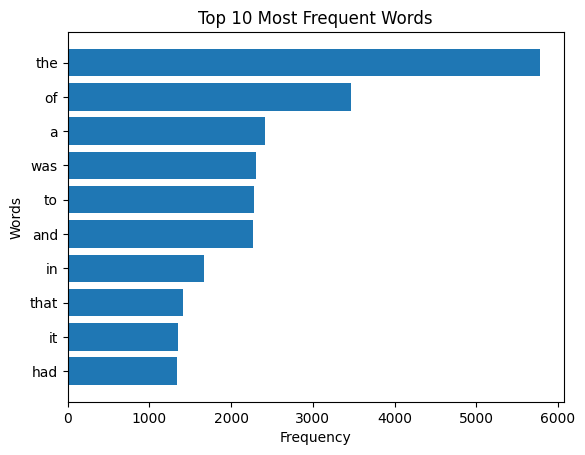

In [82]:
# Вхідний текст для обробки
url = "https://gutenberg.net.au/ebooks01/0100021.txt"
visualize_top_words(url, 10)